In [2]:
source('~/.scripts/zz_header.r')

In [1]:
file_list <- system('ls */*.res', intern = T)

In [177]:
tmp <- lapply(file_list, function(x){
    tmp <- fread(x) %>% 
    select(window, whole) %>% 
    tail(19) %>%
    arrange(-window) %>% 
    column_to_rownames('window') %>%
    mutate(y = cumsum(whole)) %>%
    select(y) %>%
    setnames('y', x %>% str_replace(.,'/.*',''))
}) %>% as.data.table 

tmp_rare <- lapply(file_list, function(x){
    tmp <- fread(x) %>% 
    select(window, rare) %>% 
    tail(19) %>%
    arrange(-window) %>% 
    column_to_rownames('window') %>%
    mutate(y = cumsum(rare)) %>%
    select(y) %>%
    setnames('y', x %>% str_replace(.,'/.*',''))
}) %>% as.data.table 

tmp_common <- lapply(file_list, function(x){
    tmp <- fread(x) %>% 
    select(window, common) %>% 
    tail(19) %>%
    arrange(-window) %>% 
    column_to_rownames('window') %>%
    mutate(y = cumsum(common)) %>%
    select(y) %>%
    setnames('y', x %>% str_replace(.,'/.*',''))
}) %>% as.data.table 

In [208]:
tmp19 <- tmp %>% 
    select(X1KGp3v5_hg19, CAAPA, GA, HRC, KoreanPanel) %>%
    mutate(Rsq = 1-seq(0,.9,.05) ) %>% 
    melt(.,id.vars = 'Rsq') %>% 
    mutate(variable = variable %>% str_remove(.,'X')) %>%
    setnames('variable', 'panel') %>%
    setnames('value','counts')
tmp38 <- tmp %>% 
    select(X1KGp3_hg38, topmed) %>% 
    mutate(Rsq = 1-seq(0,.9,.05) ) %>% 
    melt(.,id.vars = 'Rsq') %>% 
    mutate(variable = variable %>% str_remove(.,'X')) %>% 
    setnames('variable', 'panel') %>%
    setnames('value','counts')

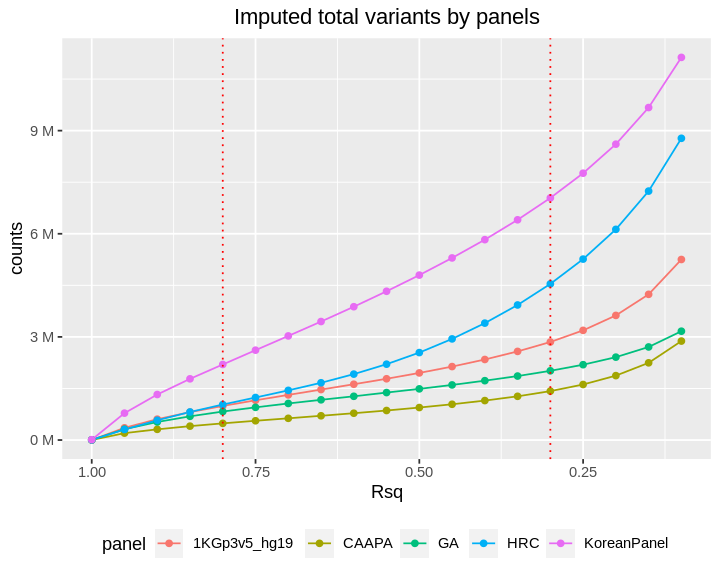

In [210]:
(total_hg19 <- ggplot(tmp19, aes(x = Rsq, y = counts, color = panel, fill = panel)) + 
    geom_line() +
    geom_point() +
    scale_x_reverse() +
    ggtitle('Imputed total variants by panels') +
    scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6))+
    theme(plot.title = element_text(hjust = .5)) + 
    geom_vline(xintercept = .3, color = 'red', linetype=3) + 
    geom_vline(xintercept = .8, color = 'red', linetype = 3) +
    theme(legend.position="bottom") )


In [215]:
ggsave('total_hg19_panelComparison.svg', total_hg19, width = 10, height = 6.67)

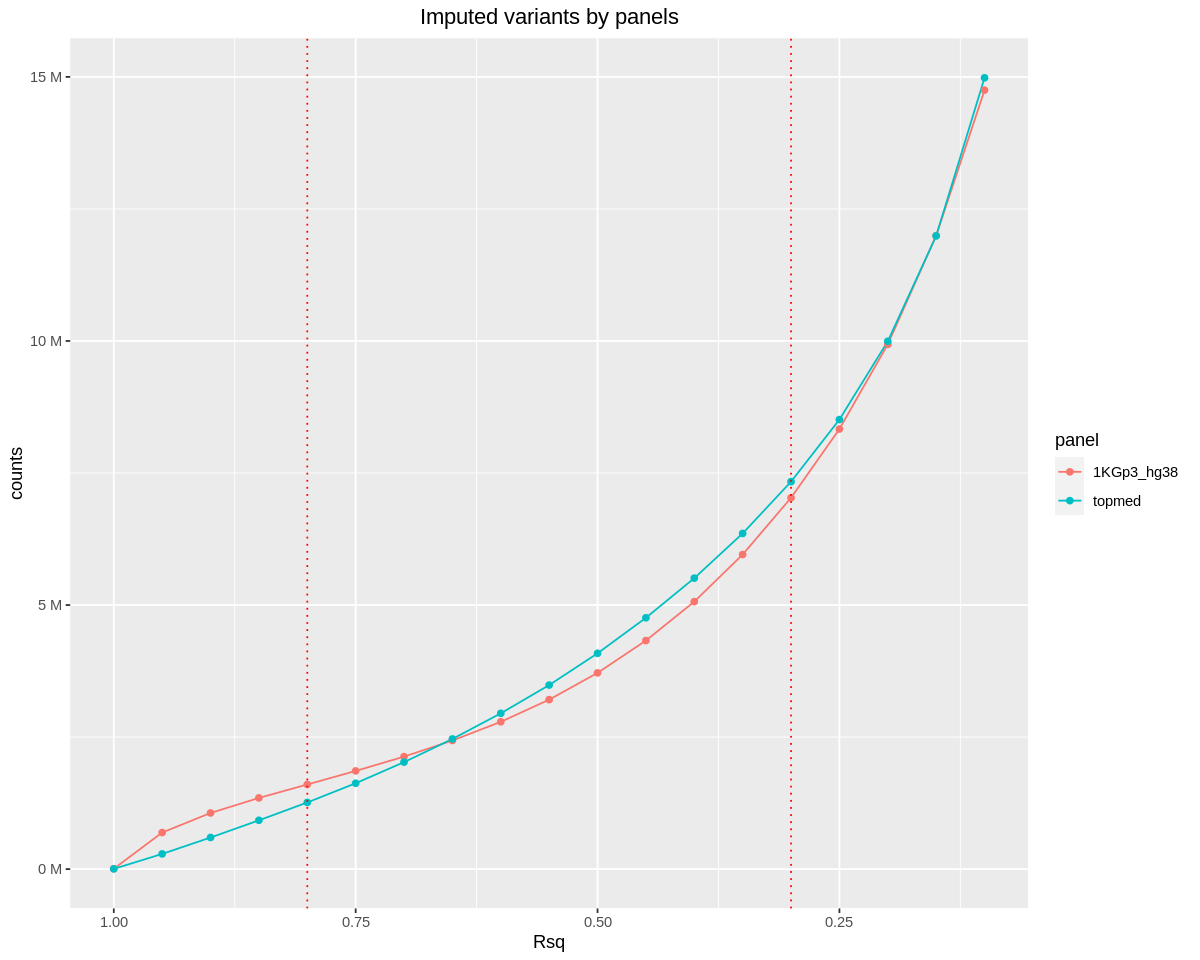

In [147]:
ggplot(tmp38, aes(x = Rsq, y = counts, color = panel, fill = panel)) + 
    geom_line() +
    geom_point() +
    scale_x_reverse() +
    ggtitle('Imputed variants by panels') +
    scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6)) +
    theme(plot.title = element_text(hjust = .5)) + 
    geom_vline(xintercept = .3, color = 'red', linetype=3) + geom_vline(xintercept = .8, color = 'red', linetype = 3) 


In [212]:
tmp19 <- tmp_rare %>% 
    select(X1KGp3v5_hg19, CAAPA, GA, HRC, KoreanPanel) %>%
    mutate(Rsq = 1-seq(0,.9,.05) ) %>% 
    melt(.,id.vars = 'Rsq') %>% 
    mutate(variable = variable %>% str_remove(.,'X')) %>%
    setnames('variable', 'panel') %>%
    setnames('value','counts')
tmp38 <- tmp_rare %>% 
    select(X1KGp3_hg38, topmed) %>% 
    mutate(Rsq = 1-seq(0,.9,.05) ) %>% 
    melt(.,id.vars = 'Rsq') %>% 
    mutate(variable = variable %>% str_remove(.,'X')) %>% 
    setnames('variable', 'panel') %>%
    setnames('value','counts')

In [213]:
rare_hg19 <- ggplot(tmp19, aes(x = Rsq, y = counts, color = panel, fill = panel)) + 
    geom_line() +
    geom_point() +
    scale_x_reverse() +
    ggtitle('Imputed rare variants by panels') +
    scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6)) +
    theme(plot.title = element_text(hjust = .5)) + 
    geom_vline(xintercept = .3, color = 'red', linetype=3) + 
    geom_vline(xintercept = .8, color = 'red', linetype = 3) +
    theme(legend.position="bottom")


In [216]:
ggsave(file = "rare_hg19_panelComparison.svg", rare_hg19, width = 10, height = 6.67)

### accessive korean panel new variant vep annotation info summmary counting 
---

In [236]:
conseq <- fread('KoreanPanel/isec/conseq', header = F)
biotype <- fread('KoreanPanel/isec/biotype', header = F)

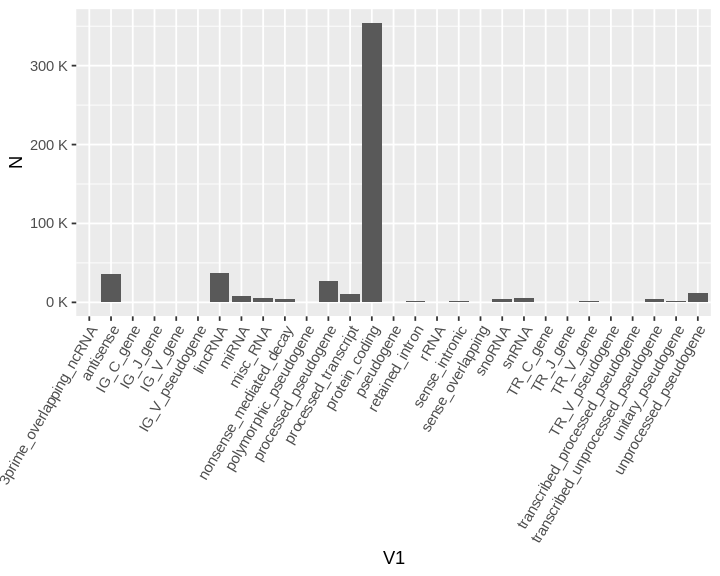

In [255]:
ggplot(biotype[,.N,V1], aes(x = V1, y= N)) +
    geom_bar(stat = 'identity') +
    scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [49]:
cohort_venn <- rbind(data.table(TOPMed = c(390267,55578,50587483)/sum(390267,55578,50587483),
                           TG_38 = c(721582,33027,50610034)/sum(721582,33027,50610034),
                           HRC = c(21633, 1011293, 64325321)/sum(21633, 1011293, 64325321),
                           TG_37 = c(1099004, 4153059, 61183555)/sum(1099004, 4153059, 61183555),
                           Korean = c(69236, 2129324, 63207290)/sum(69236, 2129324, 63207290)) %>%
    melt() %>% 
    mutate(venn = rep(c('A','B','C'),5) %>% as.factor) %>% 
    mutate(Rsq = '0.8'),
data.table(TOPMed = c(2895187,728274,49914787)/sum(2895187,728274,49914787),
                           TG_38 = c(3249806,637190,50005871)/sum(3249806,637190,50005871),
                           HRC = c(768637,3774035,61562579)/sum(768637,3774035,61562579),
                           TG_37 = c(256131,2596383,62740231)/sum(256131,2596383,62740231),
                           Korean = c(531822,6511185,58825429)/sum(531822,6511185,58825429)) %>%
    melt() %>% 
    mutate(venn = rep(c('A','B','C'),5) %>% as.factor) %>% 
    mutate(Rsq = '0.3'),
data.table(TOPMed = c(6871754,1441431,49201630)/sum(6871754,1441431,49201630),
                           TG_38 = c(8061511,1545547,49097514)/sum(8061511,1545547,49097514),
                           HRC = c(2648527,6218734,59207880)/sum(2648527,6218734,59207880),
                           TG_37 = c(1099004,4153059, 61183555)/sum(1099004,4153059, 61183555),
                           Korean = c(1309965,9820702,55515912)/sum(1309965,9820702,55515912)) %>%
    melt() %>% 
    mutate(venn = rep(c('A','B','C'),5) %>% as.factor) %>% 
    mutate(Rsq = '0.1'))


Warning message in melt.data.table(.):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(.):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(.):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


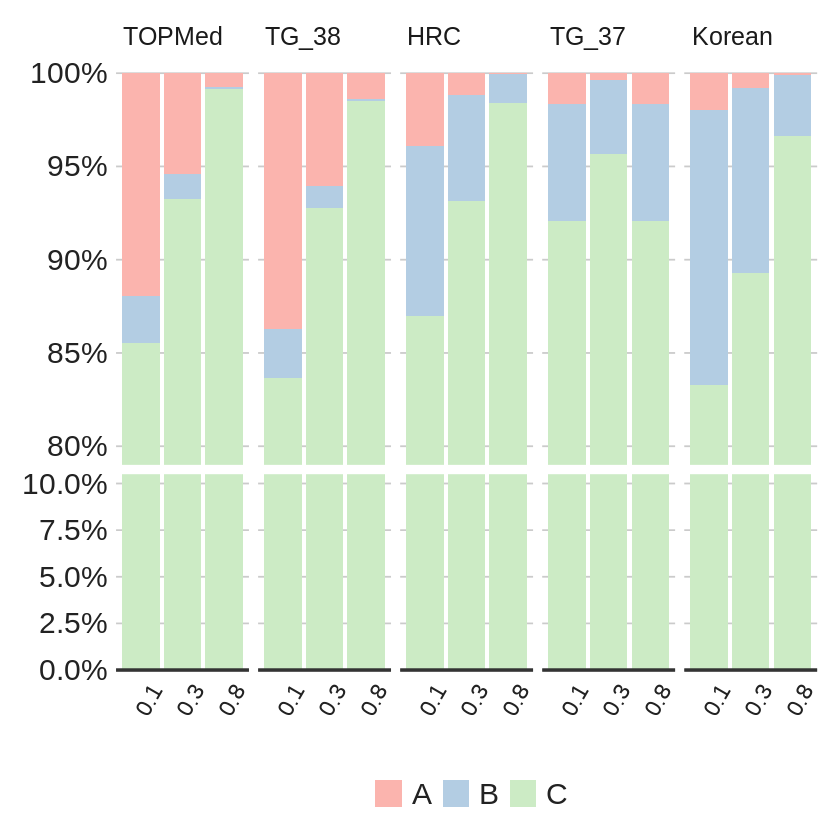

In [126]:
(pct_venn <- ggplot(cohort_venn, aes(x = Rsq, y = value, fill = venn)) + 
    geom_bar(stat = 'identity', position = 'fill') +
    bbc_style() +
    facet_grid(~variable) +
    scale_y_continuous(labels = scales::percent) +
    geom_hline(yintercept = 0, size = 1, colour = "#333333") +
    scale_y_break(c(.1, .8)) +
    scale_fill_brewer(type = "qual", palette = 4, na.value = "grey") + 
    guides(fill = guide_legend(reverse = F)) +
    theme(legend.position = "bottom", 
          legend.justification = "left", 
          strip.text = element_text(size = 15),
          axis.text.x = element_text(angle = 60, hjust = .5, size = 14, margin = margin(t=7,b=10)),
          axis.line.y.right = element_blank(),
          axis.text.y.right = element_blank()) )


In [199]:
ggsave('pct_panel_vennComparison.svg', pct_venn, width = 6.67, height = 6.67)

### vep annot read
---

In [191]:
topmed <- fread('/oak/stanford/groups/sjaiswal/gryu/AACR_RefPanelCompare/extdata/hg38/topmed/TOPMed_vep_annot.txt') %>%
    mutate(Rsq = Rsq %>% as.factor)
korean <- fread('KoreanPanel/KoreanPanel_vep_annot.txt') %>%
    mutate(Rsq = Rsq %>% as.factor)

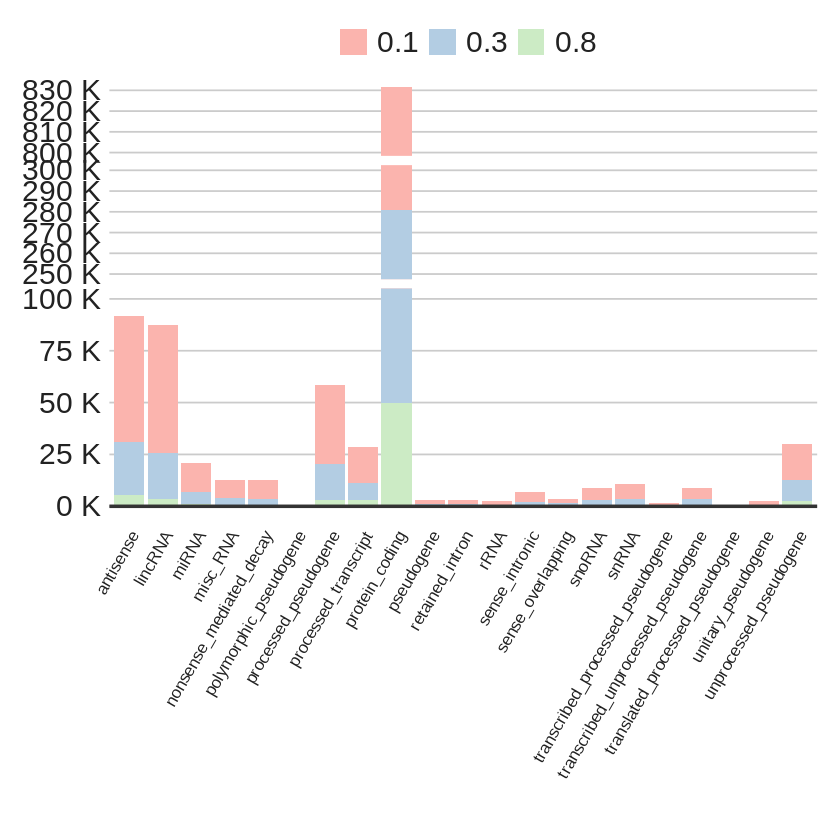

In [243]:
(vep_annot <- ggplot(korean[cohort == 'koreaA'][!biotype %in% grep('(3pri|IG|TR)',unique(korean$biotype), value = T) ], aes(x = biotype, y = N, fill = Rsq)) +
    geom_bar(position = 'identity', stat = 'identity') +
    bbc_style() +
    scale_fill_brewer(type = "qual", palette = 4, na.value = "grey") + 
    scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 10)) +
    geom_hline(yintercept = 0, size = 1, colour = "#333333") +
    scale_y_break(c(100000, 250000)) +
    scale_y_break(c(300000, 800000)) +
    theme(legend.position = "top",
    axis.line.y.right = element_blank(),
    axis.text.y.right = element_blank()))

In [244]:
ggsave('Korean_annot_box.svg', vep_annot, width = 13, height = 6.67)

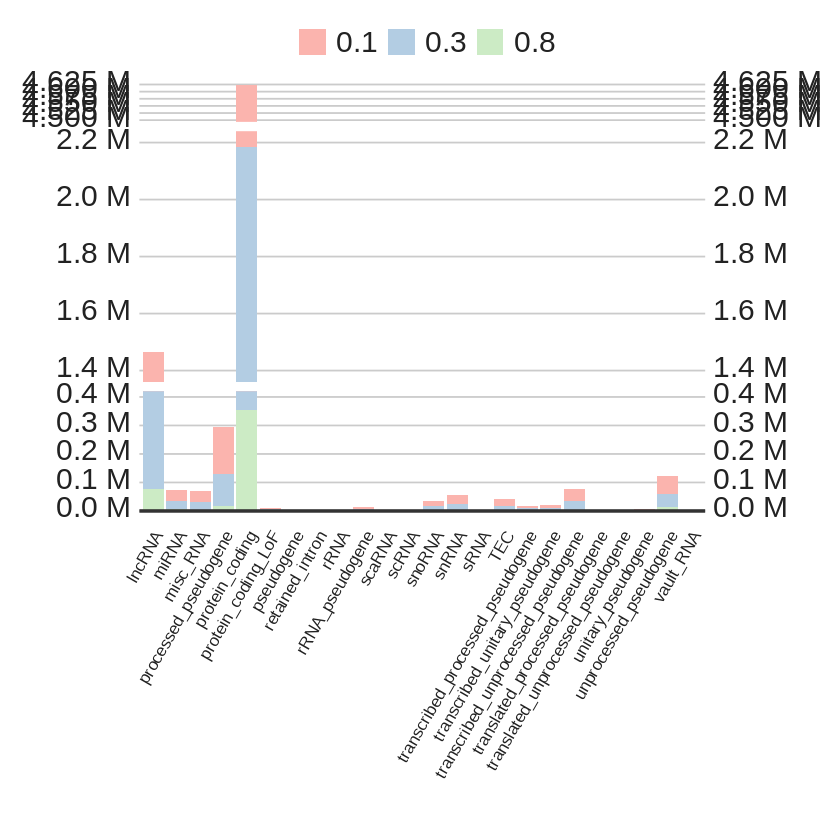

In [245]:
(vep_annot <- ggplot(topmed[cohort == 'topmedA'][!biotype %in% grep('(ribo|IG|TR)',unique(topmed$biotype), value = T)], aes(x = biotype, y = N, fill = Rsq)) +
    geom_bar(position = 'identity', stat = 'identity') +
    bbc_style() +
    scale_fill_brewer(type = "qual", palette = 4, na.value = "grey") + 
    scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 10)) +
    geom_hline(yintercept = 0, size = 1, colour = "#333333") +
    scale_y_break(c(400000, 1400000)) +
    scale_y_break(c(2200000, 4500000)) +
    theme(legend.position = "top") )

In [247]:
ggsave('topmed_annot_box.svg', vep_annot, width = 13, height = 6.67)

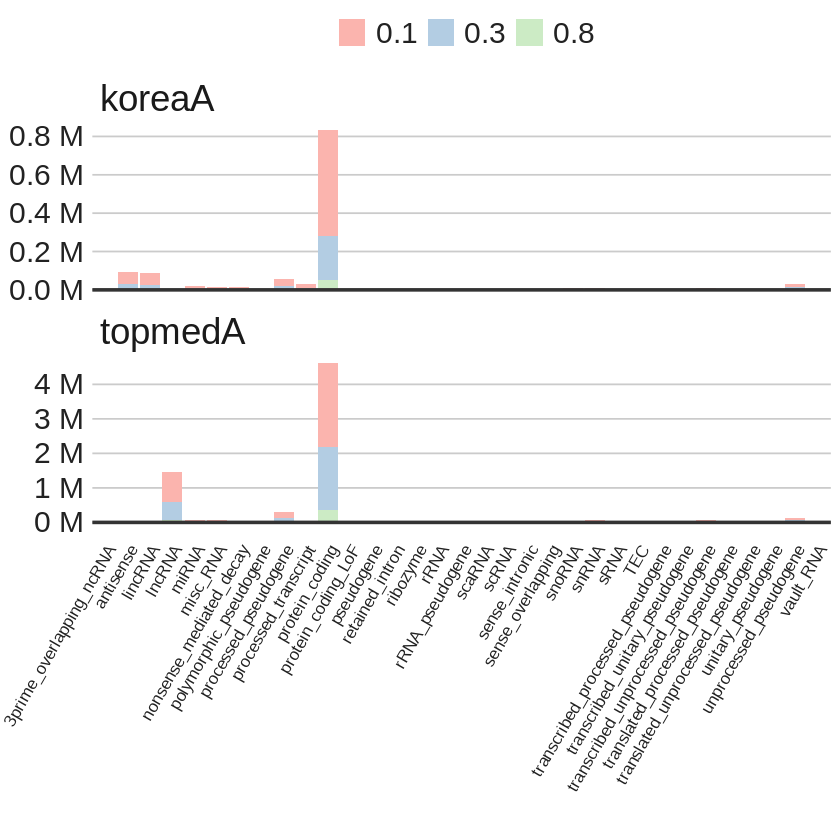

In [236]:
ggplot(tmp1[!biotype %in% grep('(IG|TR)', unique(tmp1$biotype), value = T)], aes(biotype, y = N, fill = Rsq)) +
    geom_bar(position = 'identity', stat = 'identity') +
    facet_wrap(~cohort, ncol = 1, scales="free_y") +
    bbc_style() +
    scale_fill_brewer(type = "qual", palette = 4, na.value = "grey") + 
    scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 10)) +
    geom_hline(yintercept = 0, size = 1, colour = "#333333") +
    theme(legend.position = "top") 